# Inferência

Em determinada cidade, a prefeitura disse que as famílias ali residentes teriam, em média, 2 filhos em idade escolar. Coletamos dados de 50 residências, espalhadas igualmente pela cidade

In [1]:
install.packages('moments',repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library('moments')

In [3]:
filhos <- c(3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 3, 2, 1, 2, 3, 4, 1, 1, 2, 1, 1, 1, 2, 3, 0, 2, 2, 1, 2, 3, 3,
       2, 2, 3, 2)

In [6]:
media = mean(filhos)
desvio = sd(filhos)
print(paste('Média:',media))
print(paste('Desvio:',desvio))
print(paste('Assimetria:',skewness(filhos)))
print(paste('Curtose:',kurtosis(filhos)))
print(summary(filhos))

[1] "Média: 1.84"
[1] "Desvio: 0.817162836918577"
[1] "Assimetria: 0.072175428198334"
[1] "Curtose: 3.09005206807707"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    2.00    1.84    2.00    4.00 


## Calculando z-scores

In [7]:
z1 <-qnorm(0.025)
z2 <- qnorm(0.975)
print(paste('Zscore esquerdo:',z1))
print(paste('Zscore direito:',z2))

[1] "Zscore esquerdo: -1.95996398454005"
[1] "Zscore direito: 1.95996398454005"


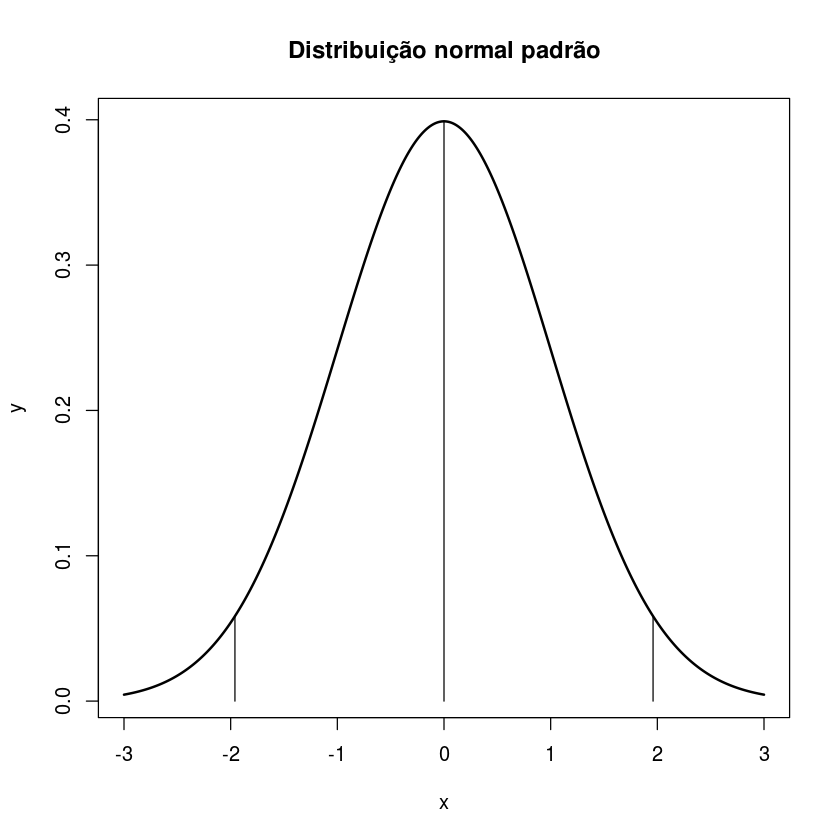

In [8]:
# Plotando a distribuição normal e o intervalo de confiança:
x <- seq(-3,3,length=500)
y <- dnorm(x,mean=0, sd=1)
plot(x,y, type="l", lwd=2, main = 'Distribuição normal padrão')

# Calculando os limites do intervalo de confiança de 95%:
lines(c(0,0),c(0,dnorm(0)))
lines(c(z1,z1),c(0,dnorm(z1)))
lines(c(z2,z2),c(0,dnorm(z2)))

In [9]:
# Calculando a margem de erro: 
E <- z2 * (desvio / sqrt(length(filhos)))
print(paste('Margem de erro:',E))
minf <- media - E
msup <- media + E
print(sprintf('A média de filhos está entre: %f e %f com 95%% de confiança',minf,msup))


[1] "Margem de erro: 0.226501820160377"
[1] "A média de filhos está entre: 1.613498 e 2.066502 com 95% de confiança"


[1] "Graus de liberdade: 49"
[1] -2.009575
[1] "Margem de erro: 0.232235108680229"
[1] "A média de filhos está entre: 1.607765 e 2.072235 com 95% de confiança"


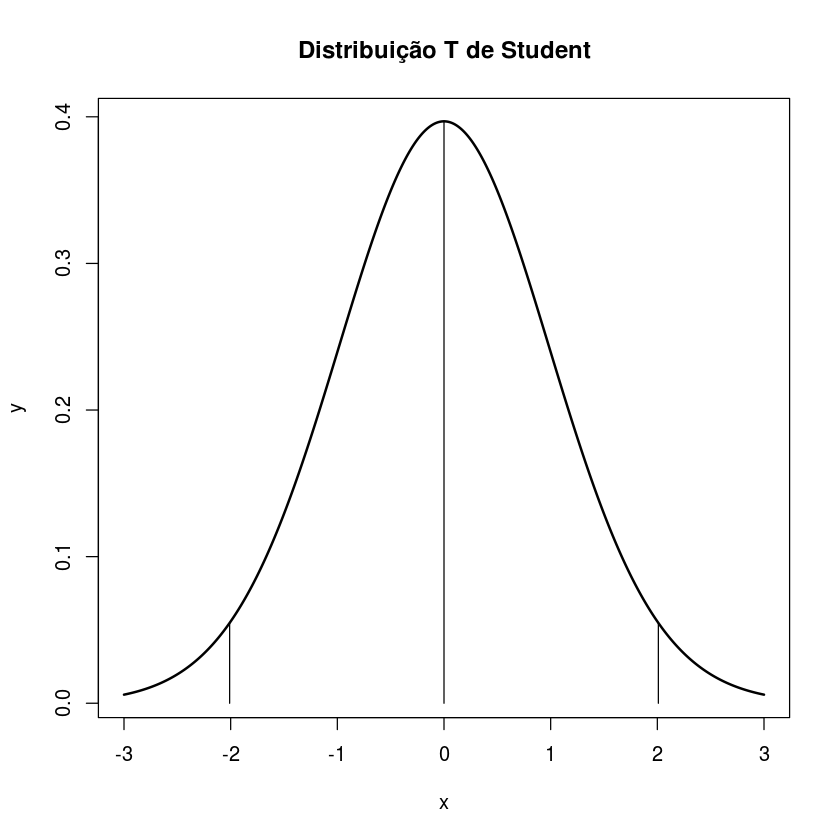

In [11]:
# Agora com distribuição T de Student:

graus = length(filhos) - 1 # Graus de liberdade
print(paste('Graus de liberdade:',graus))

# Plotando a distribuição T de Student e o intervalo de confiança:
x <- seq(-3,3,length=500)
y <- dt(x,df=graus)
plot(x,y, type="l", lwd=2, main = 'Distribuição T de Student')


t1 <-qt(0.025,df=graus)
t2 <- qt(0.975,df=graus)
print(t1)
lines(c(0,0),c(0,dt(0,df=graus)))
lines(c(t1,t1),c(0,dt(t1,df=graus)))
lines(c(t2,t2),c(0,dt(t2,df=graus)))

E2 <- t2 * (desvio / sqrt(length(filhos)))
print(paste('Margem de erro:',E2))
minf2 <- media - E2
msup2 <- media + E2
print(sprintf('A média de filhos está entre: %f e %f com 95%% de confiança',minf2,msup2))


## Testes de hipótese

In [12]:
# Teste de hipótese

lote <- c(58.5, 60.1, 60.02, 57.4, 60.3, 55.4, 58.2, 59.8, 54.3, 60.4, 60.7, 60.1, 55.6, 57.1, 60.0, 
          60.7, 60.3, 56.7,  57.9, 59.01)
print(summary(lote))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.30   57.33   59.41   58.63   60.15   60.70 


In [13]:
print(paste('Desvio padrão:',sd(lote)))

[1] "Desvio padrão: 1.9681738129278"


In [14]:
print(paste('Tamanho da amostra:',length(lote)))

[1] "Tamanho da amostra: 20"


[1] "Graus de liberdade: 19"
[1] "t-crítico -1.72913281152137"


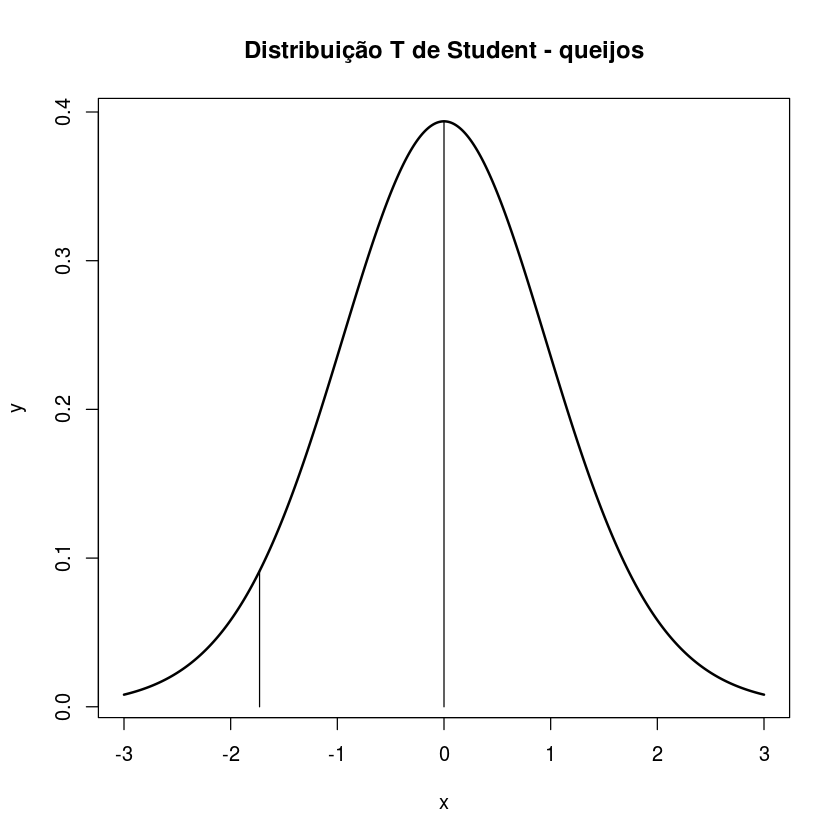

In [16]:
graus = length(lote) - 1 # Graus de liberdade
print(paste('Graus de liberdade:',graus))
tq1 <-qt(0.05,df=graus) # teste unicaudal à esquerda por isso usamos 0.05 para 95%
print(paste('t-crítico',tq1))
x <- seq(-3,3,length=500)
y <- dt(x,df=graus)
plot(x,y, type="l", lwd=2, main = 'Distribuição T de Student - queijos')
lines(c(0,0),c(0,dt(0,df=graus)))
lines(c(tq1,tq1),c(0,dt(tq1,df=graus)))

In [17]:
# Calculando o T Score da nossa amostra:
ta <- (mean(lote) - 60) / (sd(lote) / sqrt(length(lote)))
print(paste('T crítico:',ta))
if (ta < tq1) {
  print('Rejeitamos a hipótese nula')
} else {
  print('Não rejeitamos a hipótese nula')
}

[1] "T crítico: -3.12090258179716"
[1] "Rejeitamos a hipótese nula"


In [19]:
pvalue <- pt(ta, 19)
print(paste('p-value:',pvalue))

[1] "p-value: 0.00281329961018917"


In [20]:
t.test(lote,alternative = "less", mu=60, conf.level = 0.95)


	One Sample t-test

data:  lote
t = -3.1209, df = 19, p-value = 0.002813
alternative hypothesis: true mean is less than 60
95 percent confidence interval:
     -Inf 59.38749
sample estimates:
mean of x 
  58.6265 


## Teste bilateral

In [2]:
amostra <- c(95.88,101.2,102.04,100.1,98.7,96.18,97.53,100.79,
98.52,100.08,100.45,99.19,99.91,101.01,98.78,101.02,98.78,
100.18,100.94,97.12)

In [3]:
head(amostra)

[1]  95.88 101.20 102.04 100.10  98.70  96.18

In [5]:
mediah0 <- 100 # média da hipótese nula
media <- mean(amostra)
desvio <- sd(amostra)
n <- length(amostra)
gl = n - 1
print(paste('média',media,'desvio',desvio,'n',n,'gl',gl))

[1] "média 99.42 desvio 1.71949502991278 n 20 gl 19"


In [9]:
tc <-qt(0.025,df=gl)
print(paste('T-scores críticos:',tc,-tc))

[1] "T-scores críticos: -2.09302405440831 2.09302405440831"


In [10]:
t_observado <- (media - mediah0) / (desvio / sqrt(n))
print(paste('t_observado',t_observado))

[1] "t_observado -1.50848871836014"


[1] "alfa: 0.0494481421317894"
[1] "valor-p: 0.127036567330136"


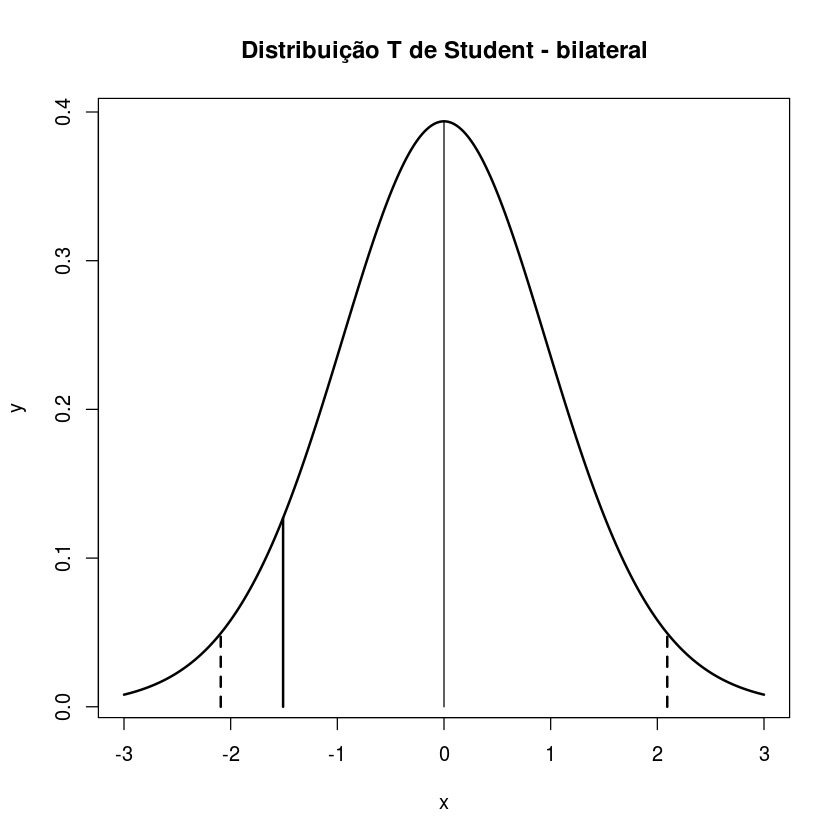

In [25]:
# Agora podemos gerar o gráfico
tc1 <- tc
tc2 <- -tc
x <- seq(-3,3,length=500)
y <- dt(x,df=gl)
plot(x,y, type="l", lwd=2, main = 'Distribuição T de Student - bilateral')
lines(c(0,0),c(0,dt(0,df=gl)))
lines(c(tc1,tc1),c(0,dt(tc1,df=gl)), lty='dashed', lwd=2)
lines(c(tc2,tc2),c(0,dt(tc2,df=gl)), lty='dashed', lwd=2)
lines(c(t_observado,t_observado),c(0,dt(t_observado,df=gl)), lwd=2)
print(paste('alfa:',dt(tc1,df=gl)))
print(paste('valor-p:',dt(t_observado,df=gl)))

In [23]:
t.test(amostra, mu=100, conf.level = 0.95)


	One Sample t-test

data:  amostra
t = -1.5085, df = 19, p-value = 0.1479
alternative hypothesis: true mean is not equal to 100
95 percent confidence interval:
  98.61525 100.22475
sample estimates:
mean of x 
    99.42 
